In [1]:
%load_ext autoreload
%autoreload 2

import nolearn.lasagne.visualize 

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
from stats import Stats

mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


Loaded /home/d/patches//cylinder1/ in 0.0013108253479 seconds.
Using test set: ['image', 'prob', 'merged_array', 'border_overlap']

Precision/Recall:
             precision    recall  f1-score   support

          0       0.94      0.87      0.90     13408
          1       0.88      0.94      0.91     13408

avg / total       0.91      0.90      0.90     26816

Test Accuracy: 0.904609188544
Accuracy Score: 0.904609188544


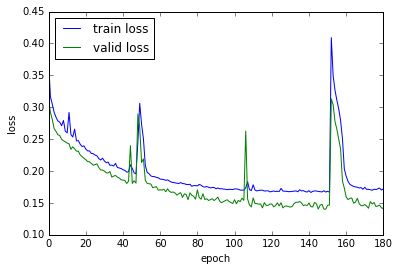

In [3]:
cnn1 = '/home/d/nets/MergeNetDropout_cylinder1_border_overlap_dropout_usevars/net.p'
cnn2 = '/home/d/nets/MergeNetDropout_cylinder1_larger_border_overlap_dropout_usevars/net.p'
cnn3 = '/home/d/nets/MergeNetThreeLegDropout_cylinder1_larger_border_overlap_dropout_usevars/net.p'

cnn, loss_plot = Stats.load_cnn(cnn1)

Loaded /home/d/patches//cylinder1/ in 0.00133395195007 seconds.
Using test set: ['image', 'prob', 'merged_array', 'larger_border_overlap']

Precision/Recall:
             precision    recall  f1-score   support

          0       0.94      0.85      0.89     13408
          1       0.86      0.95      0.90     13408

avg / total       0.90      0.90      0.90     26816

Test Accuracy: 0.896181384248
Accuracy Score: 0.896181384248


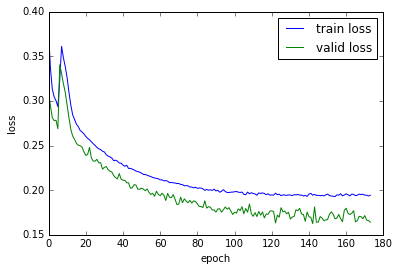

In [6]:
cnn, loss_plot = Stats.load_cnn(cnn2)

Loaded /home/d/patches//cylinder1/ in 0.000910997390747 seconds.
Using test set: ['image', 'prob', 'merged_array']

Precision/Recall:
             precision    recall  f1-score   support

          0       0.93      0.86      0.89     13408
          1       0.87      0.94      0.90     13408

avg / total       0.90      0.90      0.90     26816

Test Accuracy: 0.898642601432
Accuracy Score: 0.898642601432


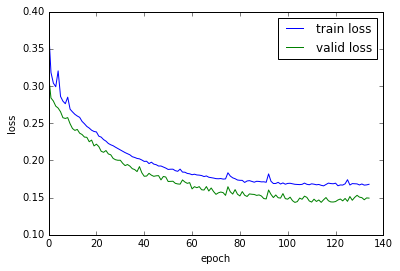

In [7]:
cnn, loss_plot = Stats.load_cnn(cnn3)

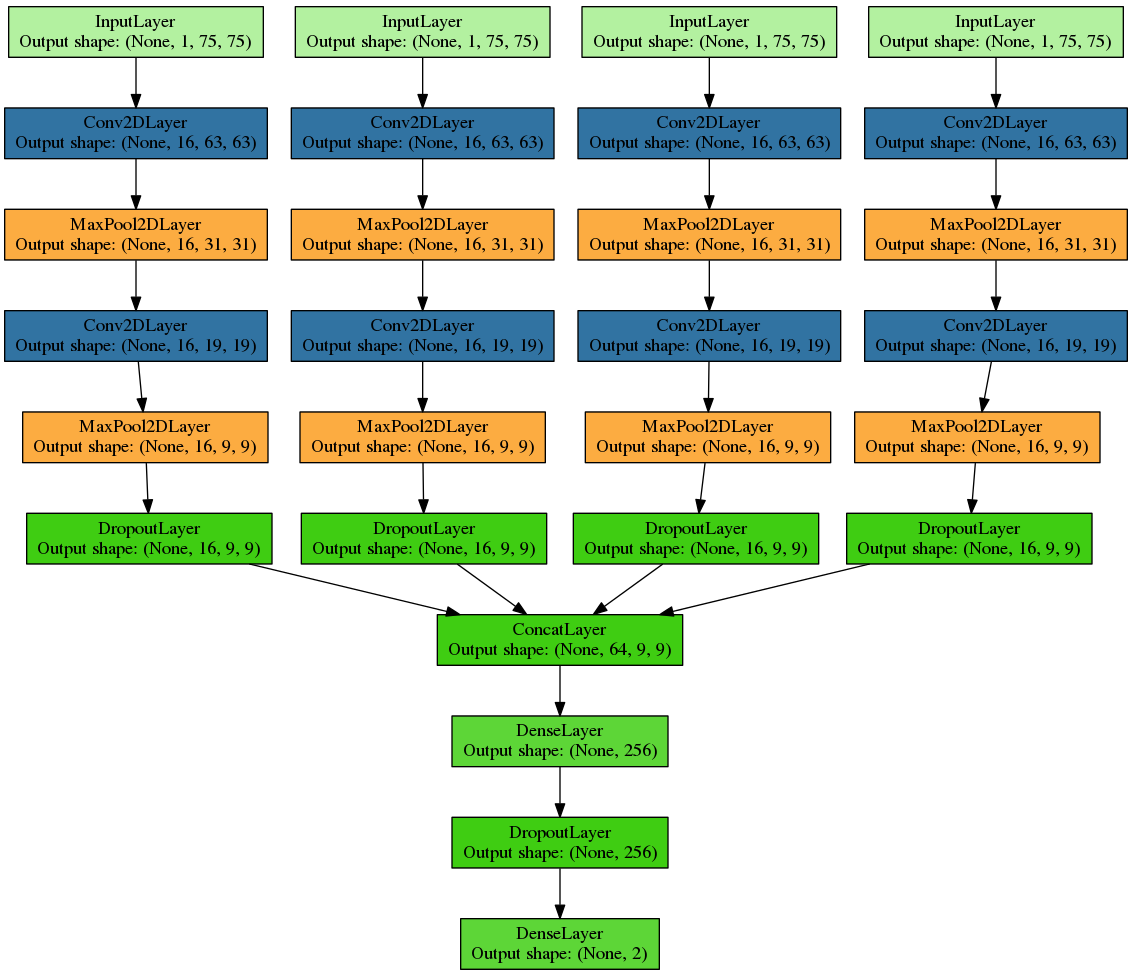

In [5]:
nolearn.lasagne.visualize.draw_to_notebook(cnn)

Loading merge errors from file..
10  merge errors found.
Loading dojo bigM from file..

Loading merge errors p < .05 and split errors p > .95 from file..
   Mean VI improvement 0.0310467901239
   Median VI improvement 0.0541137393593

Loading merge errors p < .01 and split errors p > .99 from file..
   Mean VI improvement 0.0340107191982
   Median VI improvement 0.0240585927086

Loading merge errors and split errors from simulated user from file..
   Mean VI improvement 0.106576144743
   Median VI improvement 0.0852141116863

   Re-running simulated user with er=0 .. 0.2
--- 0.0
--- 0.01
--- 0.02
--- 0.03
--- 0.04
--- 0.05
--- 0.06
--- 0.07
--- 0.08
--- 0.09
--- 0.1
--- 0.11
--- 0.12
--- 0.13
--- 0.14
--- 0.15
--- 0.16
--- 0.17
--- 0.18
--- 0.19
--- 0.2


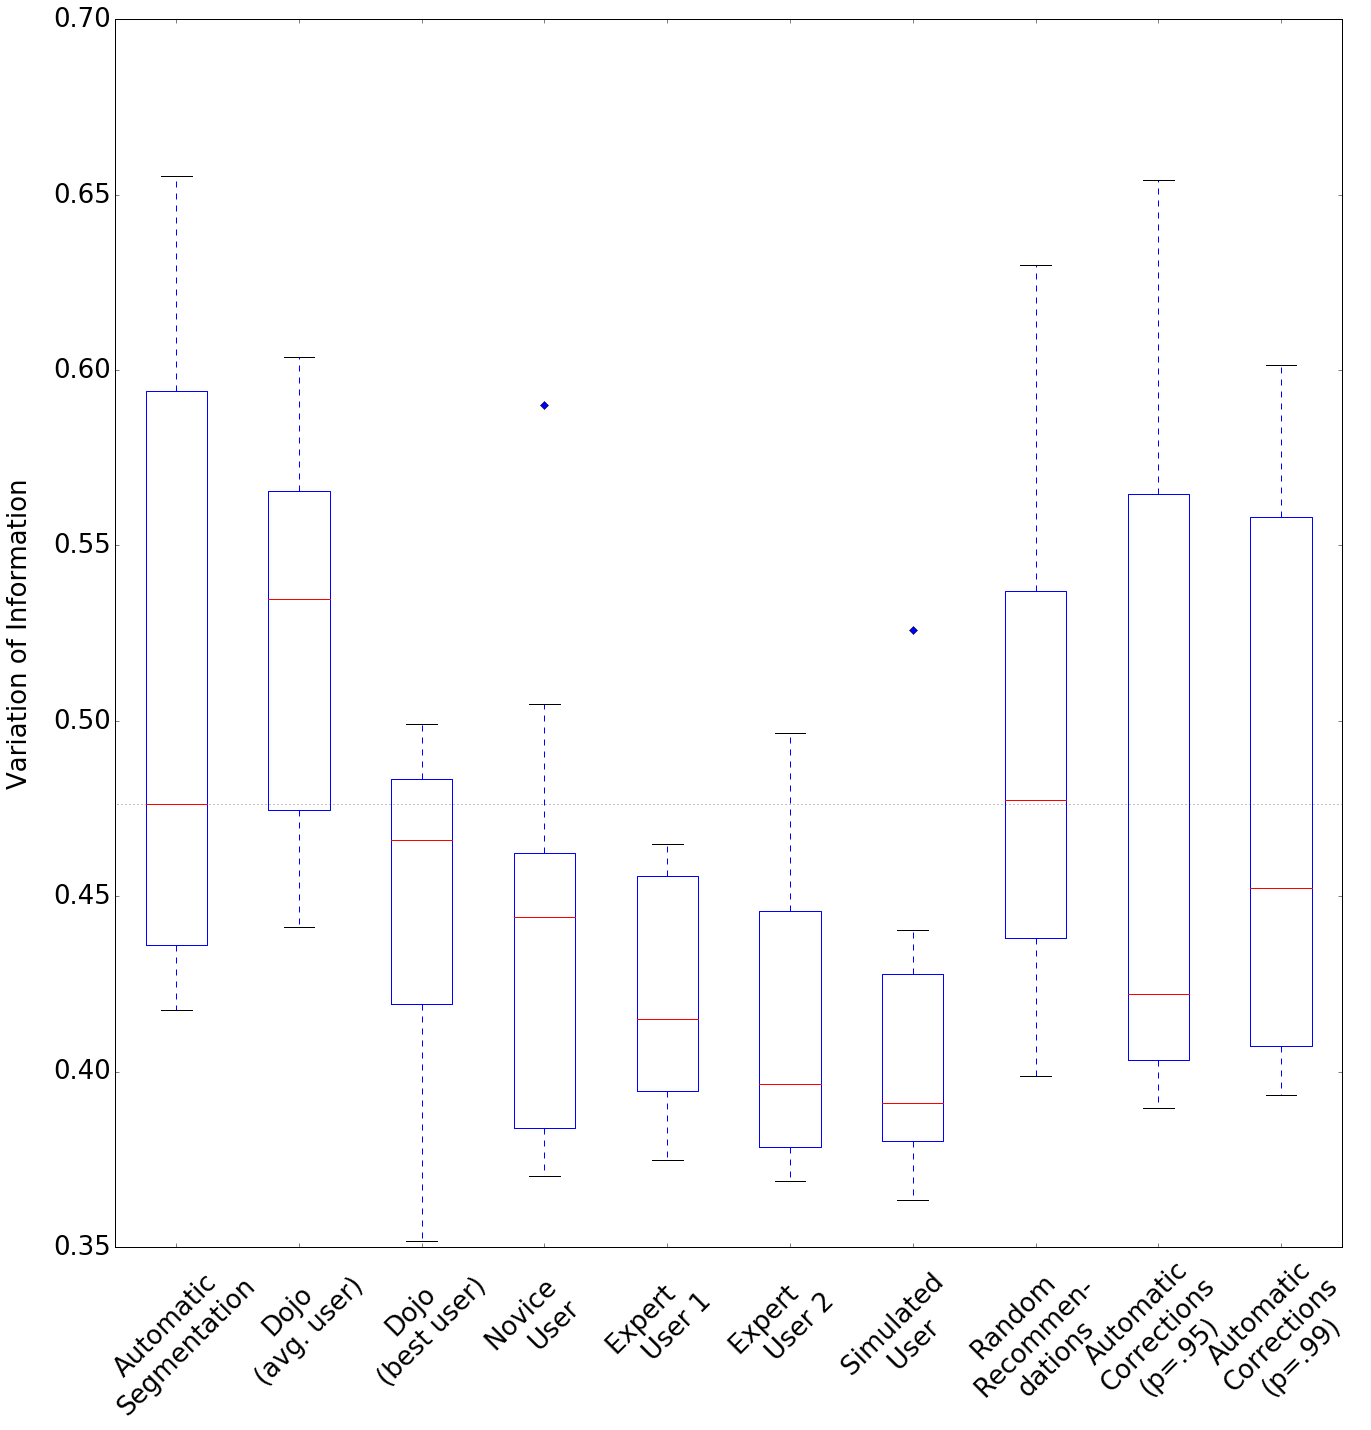

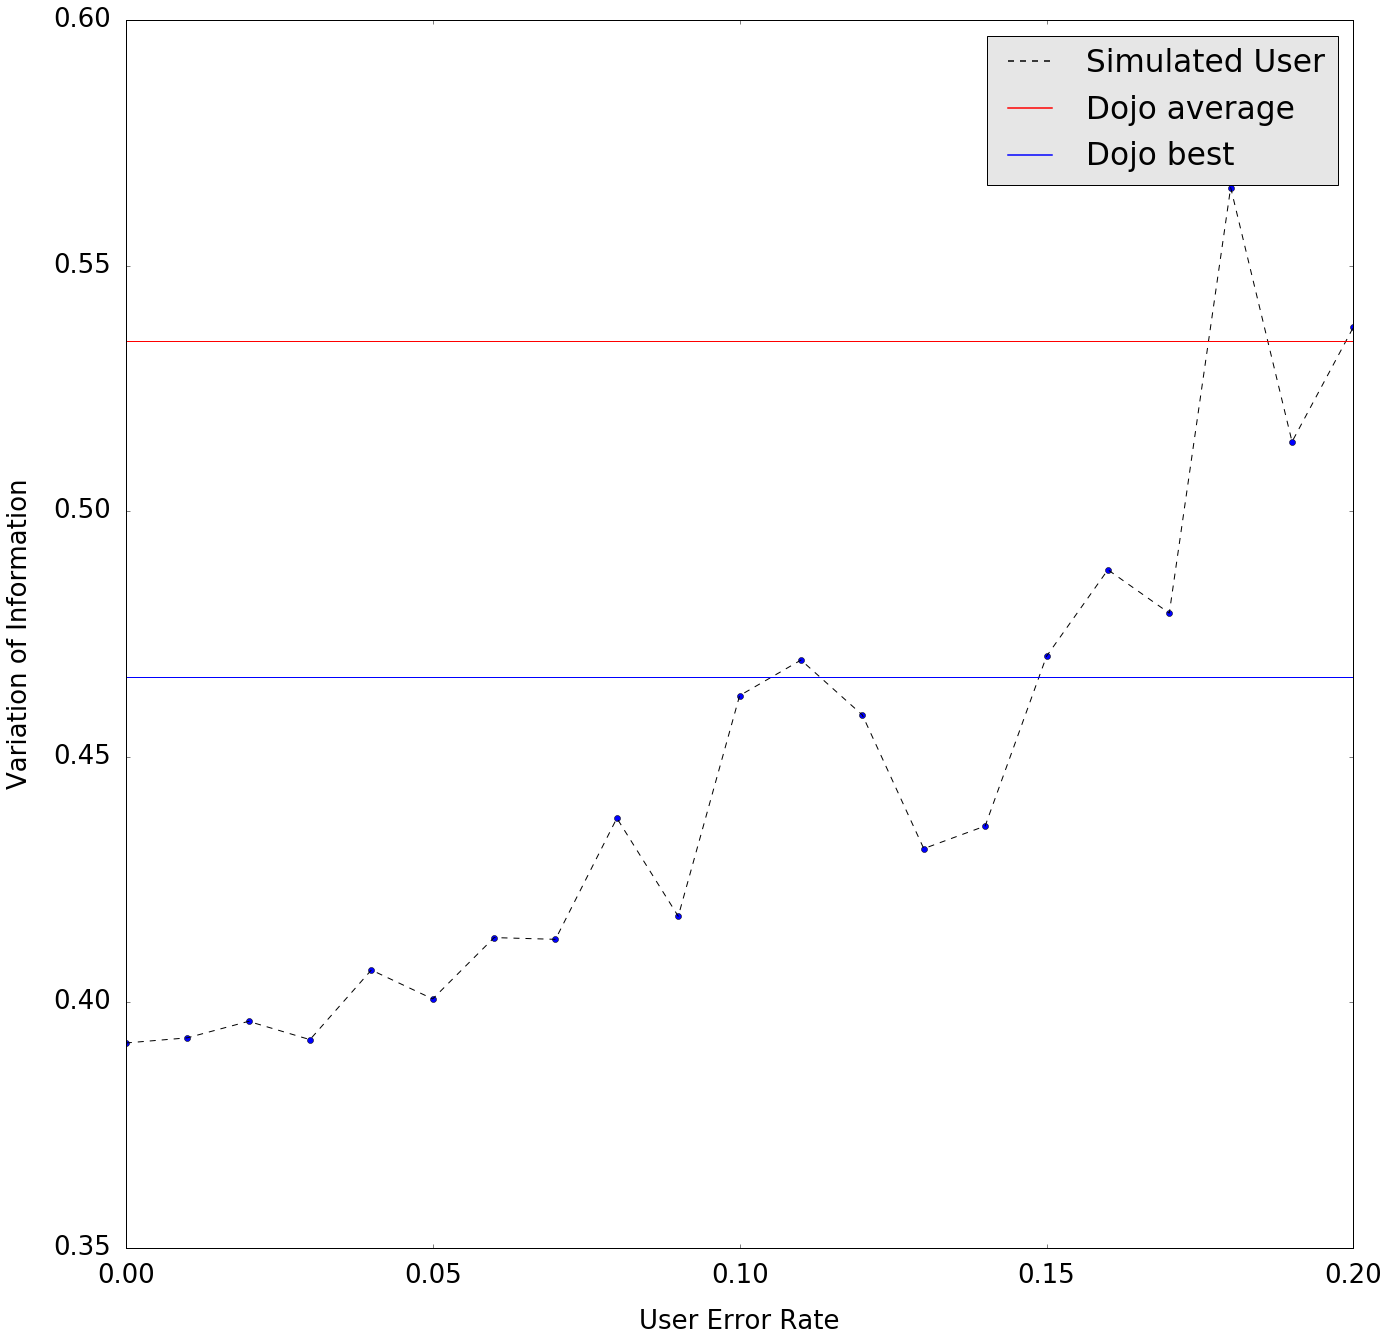

In [70]:
er, avg, best = Stats.run_dojo_xp(cnn)

In [63]:
er

OrderedDict([('0.0', 0.39170985144094406),
             ('0.01', 0.39601663815274302),
             ('0.02', 0.39690736339385602),
             ('0.03', 0.39772693739284115),
             ('0.04', 0.44080002595874168),
             ('0.05', 0.416875170940743),
             ('0.06', 0.40740125778019953),
             ('0.07', 0.41831673343211673),
             ('0.08', 0.44103439814210255),
             ('0.09', 0.46204816044638486),
             ('0.1', 0.44781646338211534),
             ('0.11', 0.44659465502565254),
             ('0.12', 0.49906985045066232),
             ('0.13', 0.44261840540170727),
             ('0.14', 0.47767646330219238),
             ('0.15', 0.53805367234367152),
             ('0.16', 0.47292630153746984),
             ('0.17', 0.57767638887480111),
             ('0.18', 0.48477199611797817),
             ('0.19', 0.49466571328668518),
             ('0.2', 0.46265648370405454)])

In [53]:
import numpy as np
np.array(bigM)

array([ array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ..., 
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]]),
       array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ..., 
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]]),
       array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ..., 
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]]),
       array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
  

In [17]:
len(er)

100

In [18]:
er

OrderedDict([('0.0', 0.39170985144094406),
             ('0.01', 0.46934906665332576),
             ('0.02', 0.47578317378657964),
             ('0.03', 0.53625069905738521),
             ('0.04', 0.4763612343909136),
             ('0.05', 0.4763612343909136),
             ('0.06', 0.4763612343909136),
             ('0.07', 0.4763612343909136),
             ('0.08', 0.4763612343909136),
             ('0.09', 0.4763612343909136),
             ('0.1', 0.4763612343909136),
             ('0.11', 0.4763612343909136),
             ('0.12', 0.4763612343909136),
             ('0.13', 0.4763612343909136),
             ('0.14', 0.4763612343909136),
             ('0.15', 0.4763612343909136),
             ('0.16', 0.4763612343909136),
             ('0.17', 0.4763612343909136),
             ('0.18', 0.4763612343909136),
             ('0.19', 0.4763612343909136),
             ('0.2', 0.4763612343909136),
             ('0.21', 0.4763612343909136),
             ('0.22', 0.4763612343909136),
          

In [64]:
import mlproof as mlp

In [11]:
input_image, input_prob, input_gold, input_rhoana, dojo_bbox = mlp.Legacy.read_dojo_data()


/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


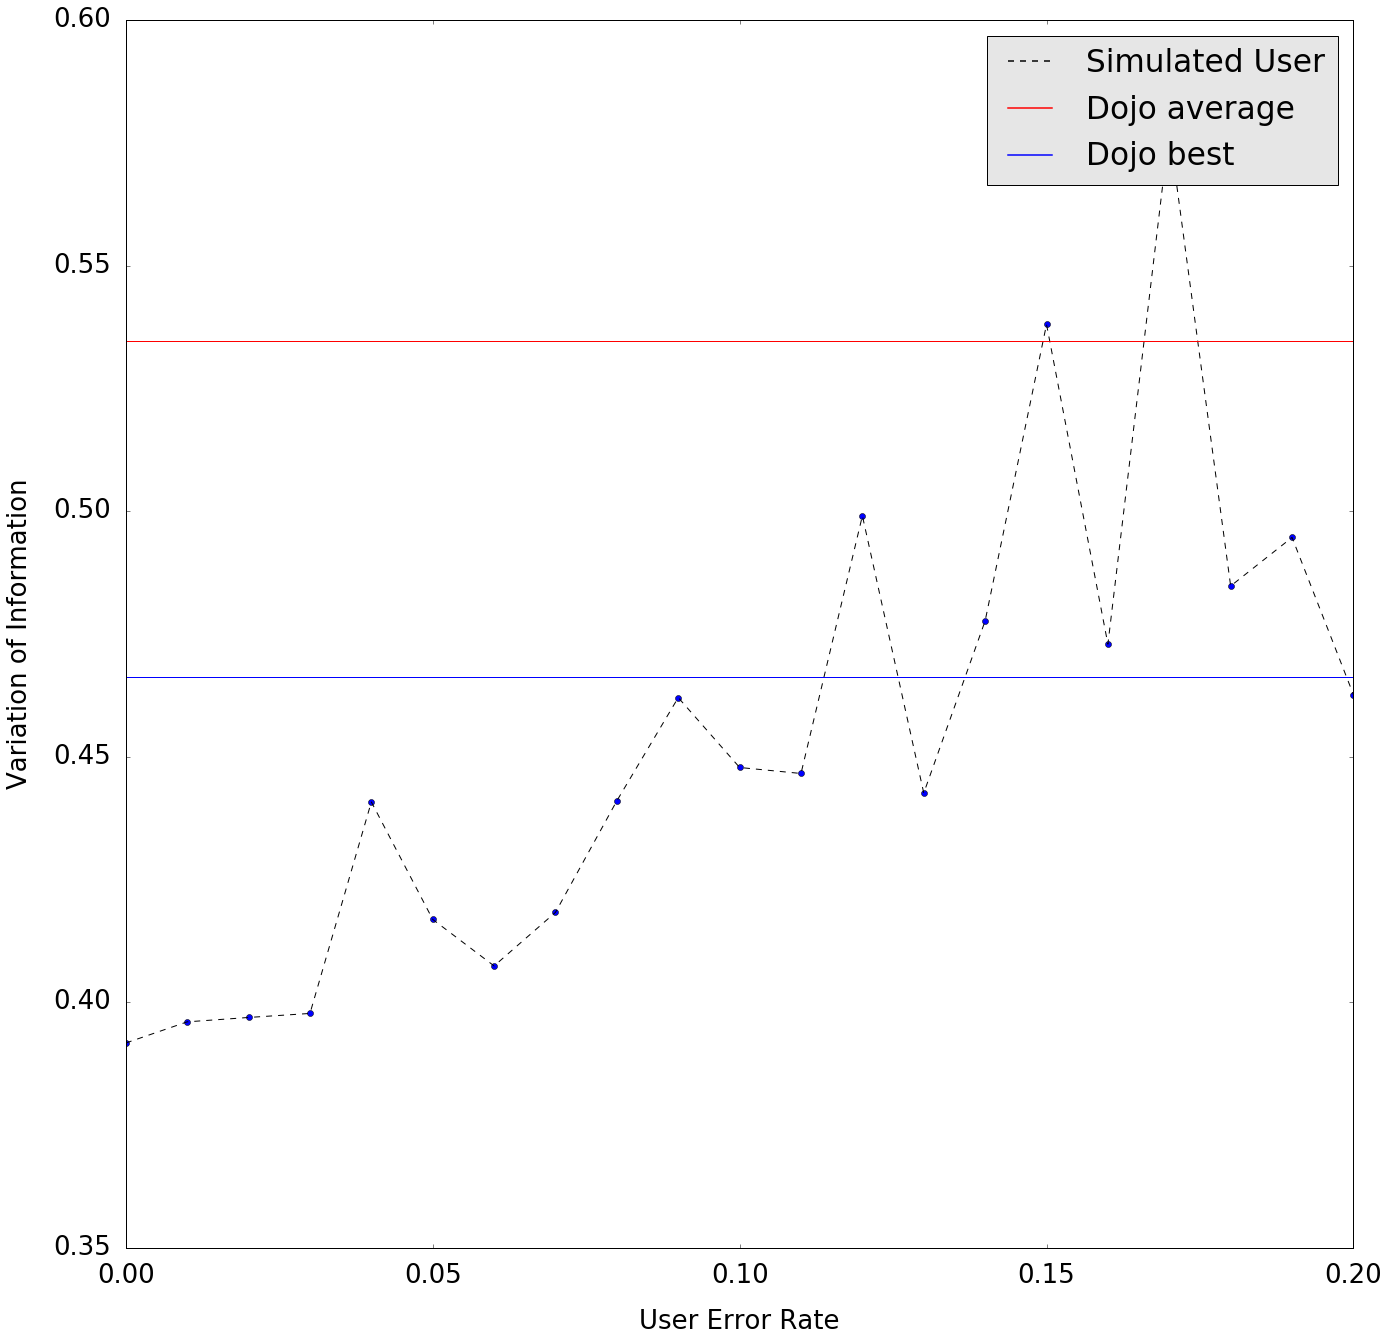

In [68]:
mlp.Legacy.plot_vis_error_rate(er, avg, best)

In [69]:
cnn.uuid

'MergeNetThreeLegDropout_cylinder1_larger_border_overlap_dropout_usevars'

In [8]:
a,b,c,d,e,f,g,h,i = mlp.Legacy.get_merge_error_image(input_image[0], input_rhoana[0], 17, me[0][3][0][1])        

NameError: name 'input_image' is not defined

In [20]:
import random

In [41]:
random.random()

0.7845736525768565

In [22]:
rnd

0.8241841575521752